In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Fle path:
ceosal_path = "C:/Users/Willians/Desktop/ceosal1.txt"

# Assign data:
data_ceo = pd.read_csv(ceosal_path)

# Explore data:
data_ceo.head()
data_ceo.describe()

# Assign features to X
X = data_ceo.roe
    #Well, it actually looks like the warning is telling you what to do.
    #As part of sklearn.pipeline stages' uniform interfaces, as a rule of thumb:
    #when you see X, it should be an np.array with two dimensions
    #when you see y, it should be an np.array with a single dimension.
X = np.array(X).reshape((len(X), 1))

# Assign values to y
y = data_ceo.salary

# Create Model
model = LinearRegression()

# Fit the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. That’s why you can replace the last two statements with this one:

model = LinearRegression().fit(x, y)


This statement does the same thing as the previous two. It’s just shorter.

When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².

The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:

In [42]:
r_sq = model.score(X, y)
print('Coefficient of Determination: ', round(r_sq*100,2))

print('Intercept: ', round(model.intercept_,3))

print('Slope: ', model.coef_)

Coefficient of Determination:  1.32
Intercept:  963.191
Slope:  [18.50118685]


In [23]:
# Predict

Y_pred = model.predict(X)


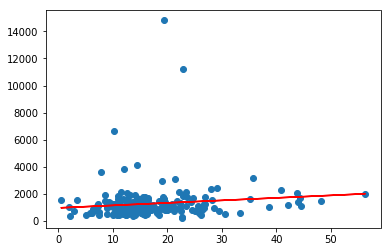

In [33]:
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()

## Advanced Linear Regression With statsmodels

You can implement linear regression in Python relatively easily by using the package statsmodels as well. Typically, this is desirable when there is a need for more detailed results.

The procedure is similar to that of scikit-learn.

### Step 1: Import packages

First you need to do some imports. In addition to numpy, you need to import statsmodels.api:

### import numpy as np
### import statsmodels.api as sm

## Step 2: Provide data and transform inputs

You can provide the inputs and outputs the same way as you did when you were using scikit-learn:

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

The input and output arrays are created, but the job is not done yet.

You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀. It doesn’t takes 𝑏₀ into account by default. This is just one function call:

### x = sm.add_constant(x)

That’s how you add the column of ones to x with add_constant(). It takes the input array x as an argument and returns a new array with the column of ones inserted at the beginning. This is how x and y look now:

>>> print(x)
[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
>>> print(y)
[ 4  5 20 14 32 22 38 43]
You can see that the modified x has three columns: the first column of ones (corresponding to 𝑏₀ and replacing the intercept) as well as two columns of the original features.

## Create a model and fit it

The regression model based on ordinary least squares is an instance of the class statsmodels.regression.linear_model.OLS. This is how you can obtain one:

## model = sm.OLS(y, x)

You should be careful here! Please, notice that the first argument is the output, followed with the input. There are several more optional parameters.

To find more information about this class, please visit the official documentation page.

Once your model is created, you can apply .fit() on it:

results = model.fit()
By calling .fit(), you obtain the variable results, which is an instance of the class statsmodels.regression.linear_model.RegressionResultsWrapper. This object holds a lot of information about the regression model.

Step 4: Get results

The variable results refers to the object that contains detailed information about the results of linear regression. Explaining them is far beyond the scope of this article, but you’ll learn here how to extract them.

You can call .summary() to get the table with the results of linear regression:

>>> print(results.summary())
OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sun, 17 Feb 2019   Prob (F-statistic):            0.00713
Time:                        19:15:07   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.268      -5.867      16.912
x1             0.4471      0.285      1.567      0.178      -0.286       1.180
x2             0.2550      0.453      0.563      0.598      -0.910       1.420
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   3.268
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.534
Skew:                           0.380   Prob(JB):                        0.766
Kurtosis:                       1.987   Cond. No.                         80.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
This table is very comprehensive. You can find many statistical values associated with linear regression including 𝑅², 𝑏₀, 𝑏₁, and 𝑏₂.

In this particular case, you might obtain the warning related to kurtosistest. This is due to the small number of observations provided.

You can extract any of the values from the table above. Here’s an example:

>>> print('coefficient of determination:', results.rsquared)
coefficient of determination: 0.8615939258756777
>>> print('adjusted coefficient of determination:', results.rsquared_adj)
adjusted coefficient of determination: 0.8062314962259488
>>> print('regression coefficients:', results.params)
regression coefficients: [5.52257928 0.44706965 0.25502548]
That’s how you obtain some of the results of linear regression:

.rsquared holds 𝑅².
.rsquared_adj represents adjusted 𝑅² (𝑅² corrected according to the number of input features).
.params refers the array with 𝑏₀, 𝑏₁, and 𝑏₂ respectively.
You can also notice that these results are identical to those obtained with scikit-learn for the same problem.

To find more information about the results of linear regression, please visit the official documentation page.

Step 5: Predict response

You can obtain the predicted response on the input values used for creating the model using .fittedvalues or .predict() with the input array as the argument:

>>> print('predicted response:', results.fittedvalues, sep='\n')
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
>>> print('predicted response:', results.predict(x), sep='\n')
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     151.9
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           1.46e-26
Time:                        20:37:23   Log-Likelihood:                -1814.4
No. Observations:                 209   AIC:                             3631.
Df Residuals:                     208   BIC:                             3634.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            63.5380      5.156     12.324      0.0

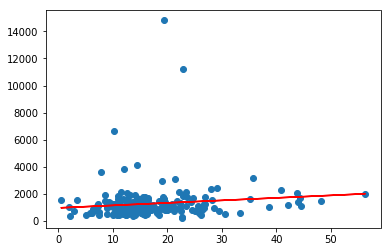

In [40]:
#ORDINARY LEAST SQUARES

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = data_ceo.roe
y = data_ceo.salary
X, y = np.array(X), np.array(y)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()